In [ ]:
!pip3 install beautifulsoup4 --quiet
!pip3 install lxml --quiet
!pip3 install requests --quiet
!pip3 install nltk --quiet
!pip3 install spacy --quiet
!pip3 install seab
!python3 -m spacy download en_core_web_sm --quiet
!pip3 install imblearn --quiet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

from nltk.corpus import stopwords


# A test attempt to extract name and email from text
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import ssl
from nltk.stem.snowball import SnowballStemmer
import nltk

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')
nltk.download('punkt')

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
df.head()

text  category  \
0  From: Mamatha Devineni Ratnam <mr47+@andrew.cm...        10   
1  From: mblawson@midway.ecn.uoknor.edu (Matthew ...         3   
2  From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...        17   
3  From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...         3   
4  From: Alexander Samuel McDiarmid <am2o+@andrew...         4   

                      topic                                         clean_text  
0          rec.sport.hockey  mamatha devineni ratnam subject pen fan reacti...  
1  comp.sys.ibm.pc.hardware  mblawsonmidwayecnuoknoredu matthew lawsonsubje...  
2     talk.politics.mideast  hilmierdsvsus hilmi erensubject armenia say co...  
3  comp.sys.ibm.pc.hardware  guydaustinibmcom guy dawsonsubject ide vs scsi...  
4     comp.sys.mac.hardware  alexand samuel mcdiarmid subject driver organ ...

In [4]:
clean_text_cat = {}
# category and one big concatenated text    
for cat in df['topic'].unique():
    clean_text_cat[cat] = " ".join(df[df['topic'] == cat]['clean_text'].values)


from collections import Counter

most_freq_words = {}
for cat in clean_text_cat.keys():
    words = clean_text_cat[cat].split(" ")
    word_count = Counter(words)
    most_freq_words[cat] = word_count.most_common(10)
    print(cat, most_freq_words[cat])
    print()



rec.sport.hockey [('game', 1481), ('team', 1165), ('play', 930), ('hockey', 765), ('go', 722), ('player', 642), ('get', 605), ('would', 597), ('year', 573), ('univers', 544)]

comp.sys.ibm.pc.hardware [('drive', 1197), ('use', 923), ('scsi', 815), ('card', 652), ('system', 545), ('get', 539), ('one', 518), ('control', 496), ('ide', 476), ('would', 469)]

talk.politics.mideast [('armenian', 1827), ('peopl', 1373), ('one', 1231), ('israel', 1163), ('would', 976), ('isra', 952), ('articl', 929), ('turkish', 928), ('said', 881), ('jew', 851)]

comp.sys.mac.hardware [('mac', 776), ('use', 735), ('appl', 562), ('drive', 494), ('problem', 492), ('get', 486), ('one', 484), ('would', 448), ('univers', 433), ('know', 424)]

sci.electronics [('use', 1071), ('one', 700), ('would', 639), ('articl', 481), ('univers', 437), ('know', 435), ('wire', 432), ('like', 420), ('get', 404), ('work', 387)]

talk.religion.misc [('god', 910), ('one', 745), ('christian', 639), ('say', 600), ('would', 561), ('arti

In [5]:
rare = []
rare_words = {}
# words that appeat less than 15 times
for cat in clean_text_cat.keys():
    words = clean_text_cat[cat].split(" ")
    word_count = Counter(words)
    rare_words[cat] = [word for word in word_count.keys() if word_count[word] < 20]
    print(cat, rare_words[cat])
    rare += rare_words[cat]
    print()


rec.sport.hockey ['mamatha', 'devineni', 'ratnam', 'reactionsorgan', 'poandrewcmuedui', 'basher', 'confus', 'lackof', 'massacr', 'actuallyi', 'puzzl', 'reliev', 'endto', 'nonpittsburgh', 'relief', 'prais', 'theyar', 'whyhe', 'lotfo', 'fun', 'offun', 'pulp', 'finalregular', 'hellnntppostinghost', 'istslin', 'fovjiwbmiumhtandrewcmuedu', 'writeswel', 'theloc', 'half', 'playingstuff', 'deletedok', 'solut', 'ableto', 'gamesth', 'njpitt', 'lacal', 'buffbo', 'fox', 'monqu', 'ifeach', 'max', 'oddconsecut', 'pure', 'guessi', 'tvs', 'hous', 'sidebysid', 'monqueand', 'eye', 'bosbuff', 'twoafternoon', 'gamesbtw', 'commentat', 'seemedto', 'audienc', 'wellschool', 'loreand', 'imparti', 'imodchhabrastplistsca', 'suffer', 'shortag', 'masksnntppostinghost', 'haventseen', 'distanc', 'thesabr', 'tag', 'paint', 'onthat', 'ouch', 'tryingto', 'bruinsabr', 'wow', 'everlook', 'whoever', 'givenfuhr', 'wish', 'csarielyorkuca', 'shawn', 'luddingtonsubject', 'draftorgan', 'iomainemaineedu', 'jon', 'carr', 'writes

In [6]:
stop_word_add_on = ['from', 'to', 'subject', 'go', 'one', 'use', 'say', 'would', 'know', 'get', 'would', 'articl', 'think', 'get ', 'universe', 'like', 'know','univers', 'use', 'ask', 'want']



In [7]:




def strip_tags(text):
    soup = BeautifulSoup(text, "html.parsxer")
    return soup.get_text()

def strip_numeric(text):
    return re.sub(r'\d+', '', text)

def strip_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

def strip_multiple_whitespaces(text):
    return re.sub(r'\s+', ' ', text).strip()

def remove_newline(text):
    return text.replace('\n', '')

def transform_to_lower(text):
    return text.lower()

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    stop_words.update(stop_word_add_on)

    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

def remove_single_char(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if len(word) > 1]
    return ' '.join(filtered_words)

def stem_text(text):
    stemmer = SnowballStemmer("english")
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

def clean_text(text):
    if text is None:
        return ""
    text = strip_tags(text)
    text = strip_numeric(text)
    text = strip_punctuation(text)
    text = remove_newline(text)
    text = strip_multiple_whitespaces(text)
    text = transform_to_lower(text)
    text = remove_stopwords(text)
    text = remove_single_char(text)
    text = stem_text(text)
    return text

# check if cleaned_data.csv exists
import os

df['clean_text'] = df['clean_text'].apply(clean_text)
df.to_csv("cleaned_data.csv", index=False)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anushkrishnav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anushkrishnav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
df[df['clean_text'].str.contains("scsi")]['topic'].value_counts()

topic
comp.sys.ibm.pc.hardware    139
comp.sys.mac.hardware        95
misc.forsale                 40
comp.os.ms-windows.misc      11
comp.graphics                 8
sci.electronics               5
comp.windows.x                2
talk.politics.misc            2
rec.autos                     1
talk.politics.guns            1
alt.atheism                   1
sci.crypt                     1
Name: count, dtype: int64

In [9]:
df[df['clean_text'].str.contains("ibm")]['topic'].value_counts()

topic
comp.sys.ibm.pc.hardware    135
comp.graphics                88
misc.forsale                 67
comp.os.ms-windows.misc      58
comp.windows.x               56
sci.crypt                    52
rec.sport.baseball           50
comp.sys.mac.hardware        44
sci.space                    42
sci.electronics              37
rec.autos                    24
rec.motorcycles              24
sci.med                      20
alt.atheism                  17
soc.religion.christian       15
talk.politics.mideast        11
talk.politics.guns            8
talk.politics.misc            8
talk.religion.misc            4
Name: count, dtype: int64

In [10]:
df[df['clean_text'].str.contains("hardware")]['topic'].value_counts()

topic
comp.sys.ibm.pc.hardware    34
comp.sys.mac.hardware       23
sci.crypt                   12
comp.graphics               10
sci.space                   10
comp.windows.x               9
sci.electronics              8
comp.os.ms-windows.misc      6
misc.forsale                 6
rec.autos                    1
Name: count, dtype: int64

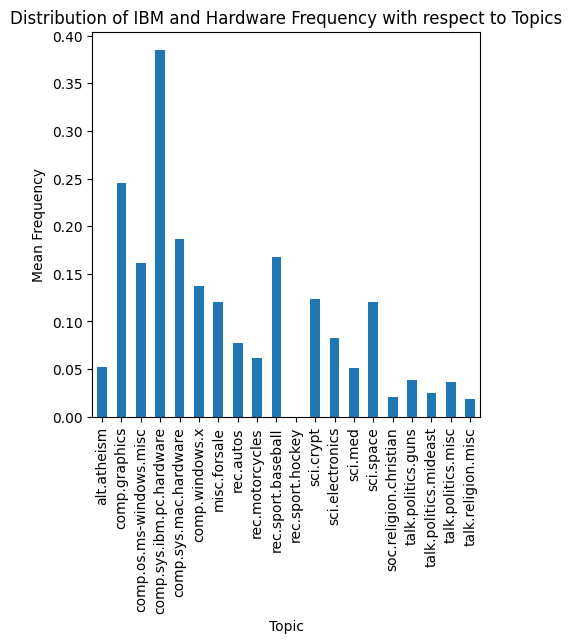

In [11]:
# frequency of ibm and hardware in the ssame text in every clean_text
df['ibm_freq'] = df['clean_text'].apply(lambda x: x.count("ibm"))
df['hardware_freq'] = df['clean_text'].apply(lambda x: x.count("hardware"))
df['ibm_hardware_freq'] = df['clean_text'].apply(lambda x: x.count("ibm") + x.count("hardware"))
# drop the ibm_freq and hardware_freq columns
df.drop(columns=['ibm_freq', 'hardware_freq'], inplace=True)
# plot the frequency of ibm and hardware across topics



df.groupby('topic')['ibm_hardware_freq'].mean().plot(kind='bar', figsize=(5, 5))
plt.title('Distribution of IBM and Hardware Frequency with respect to Topics')
plt.xlabel('Topic')
plt.ylabel('Mean Frequency')
plt.show()


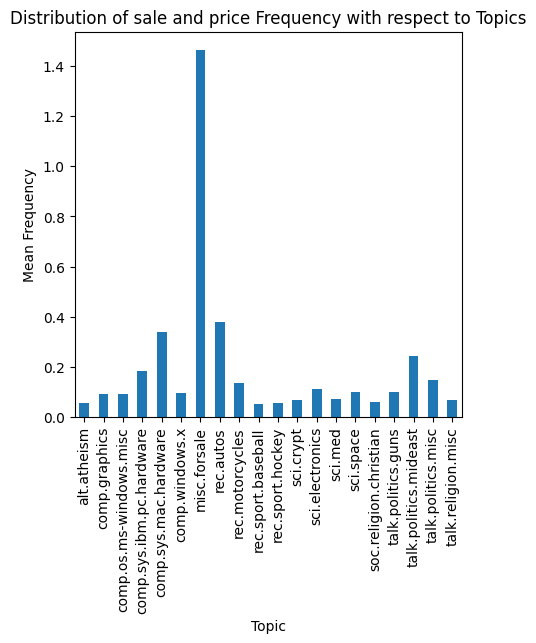

In [12]:
# frequency of sale and price in the ssame text in every clean_text
df['sale_freq'] = df['clean_text'].apply(lambda x: x.count("sale"))
df['price_freq'] = df['clean_text'].apply(lambda x: x.count("price"))
df['sale_price_freq'] = df['clean_text'].apply(lambda x: x.count("sale") + x.count("price"))
# drop the sale_freq and price_freq columns
df.drop(columns=['sale_freq', 'price_freq'], inplace=True)
# plot the frequency of sale and price across topics



df.groupby('topic')['sale_price_freq'].mean().plot(kind='bar', figsize=(5, 5))
plt.title('Distribution of sale and price Frequency with respect to Topics')
plt.xlabel('Topic')
plt.ylabel('Mean Frequency')
plt.show()



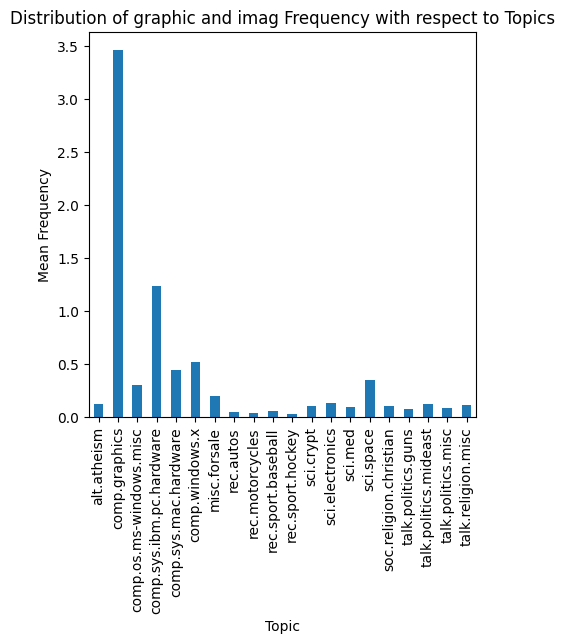

In [13]:
# frequency of graphic and imag in the ssame text in every clean_text
df['graphic_freq'] = df['clean_text'].apply(lambda x: x.count("graphic"))
df['imag_freq'] = df['clean_text'].apply(lambda x: x.count("imag"))
df['scsi_freq'] = df['clean_text'].apply(lambda x: x.count("scsi"))

df['graphic_imag_freq'] = df['clean_text'].apply(lambda x: x.count("graphic") + x.count("imag")+ x.count("scsi"))
# drop the graphic_freq and imag_freq columns
df.drop(columns=['graphic_freq', 'imag_freq', 'scsi_freq'], inplace=True)
# plot the frequency of graphic and imag across topics



df.groupby('topic')['graphic_imag_freq'].mean().plot(kind='bar', figsize=(5, 5))
plt.title('Distribution of graphic and imag Frequency with respect to Topics')
plt.xlabel('Topic')
plt.ylabel('Mean Frequency')
plt.show()

In [67]:
# sample 5 rows where ibm_hardware_freq	sale_price_freq	graphic_imag_freq are not 0
df[(df['ibm_hardware_freq'] != 0) | (df['sale_price_freq'] != 0) | (df['graphic_imag_freq'] != 0)].sample(5)

topic  \
12100          comp.graphics   
16470  comp.sys.mac.hardware   
5040                 sci.med   
5078               sci.space   
1776           comp.graphics   

                                              clean_text  ibm_hardware_freq  \
12100  schwartzilsnwuedu dian schwartzsubject sigkid ...                  1   
16470  markbilpincouk mark allertonsubject sale macin...                  0   
5040   fulkcsrochesteredu mark fulksubject scienc met...                  0   
5078   tmmsuedu tomsubject moonba racexad forward spa...                  1   
1776   georgeccmaillarcnasagov georg brownsubject qcm...                  0   

       sale_price_freq  graphic_imag_freq  
12100                0                  3  
16470                2                  0  
5040                 0                  1  
5078                 0                  1  
1776                 0                  3

In [33]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, f1_score
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Assuming df contains the dataset

# Split the data into train (75%), validation (10%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(df[['clean_text', 'ibm_hardware_freq', 'sale_price_freq','graphic_imag_freq']], df['topic'], test_size=0.25, random_state=42, stratify=df['topic'])
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42, stratify=y_temp)

text_transformer = ('text', Pipeline([('tfidf', TfidfVectorizer(analyzer='word', max_features=10000)), 
                                      ('scaler', MaxAbsScaler())]), 'clean_text')

numeric_transformer = ('numeric', 'passthrough', ['ibm_hardware_freq', 'sale_price_freq', 'graphic_imag_freq'])

preprocessor = ColumnTransformer(
    transformers=[
        text_transformer,
        numeric_transformer,
    ]
)

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier',
                              VotingClassifier(estimators=[('svc', LinearSVC(C=0.1, dual=False, max_iter=500)),
                                                         ('logreg', LogisticRegression(class_weight='balanced', max_iter=5000, multi_class='multinomial')),]))])

# Fit the model on the training set
pipeline.fit(X_train, y_train)



y_pred_val = pipeline.predict(X_val)

y_pred_test = pipeline.predict(X_test)





In [34]:
# Evaluate the model
# f1 scores

print("\nValidation Set F1 Score:")
print(f1_score(y_val, y_pred_val, average='weighted'))
print("\nTest Set F1 Score:")
print(f1_score(y_test, y_pred_test, average='weighted'))

print("\nValidation Set Classification Report:")
print(classification_report(y_val, y_pred_val))

# Evaluate the model on the test set
print("Test Set Classification Report:")
print(classification_report(y_test, y_pred_test))




Validation Set F1 Score:
0.8853920490129934

Test Set F1 Score:
0.8903416201480079

Validation Set Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.91      0.89      0.90        80
           comp.graphics       0.80      0.82      0.81        97
 comp.os.ms-windows.misc       0.77      0.77      0.77        98
comp.sys.ibm.pc.hardware       0.71      0.79      0.75        98
   comp.sys.mac.hardware       0.86      0.86      0.86        96
          comp.windows.x       0.83      0.93      0.88        99
            misc.forsale       0.83      0.73      0.78        98
               rec.autos       0.88      0.85      0.87        99
         rec.motorcycles       0.93      0.90      0.91        99
      rec.sport.baseball       0.93      0.92      0.92       100
        rec.sport.hockey       0.97      0.99      0.98       100
               sci.crypt       0.99      0.95      0.97        99
         sci.elect

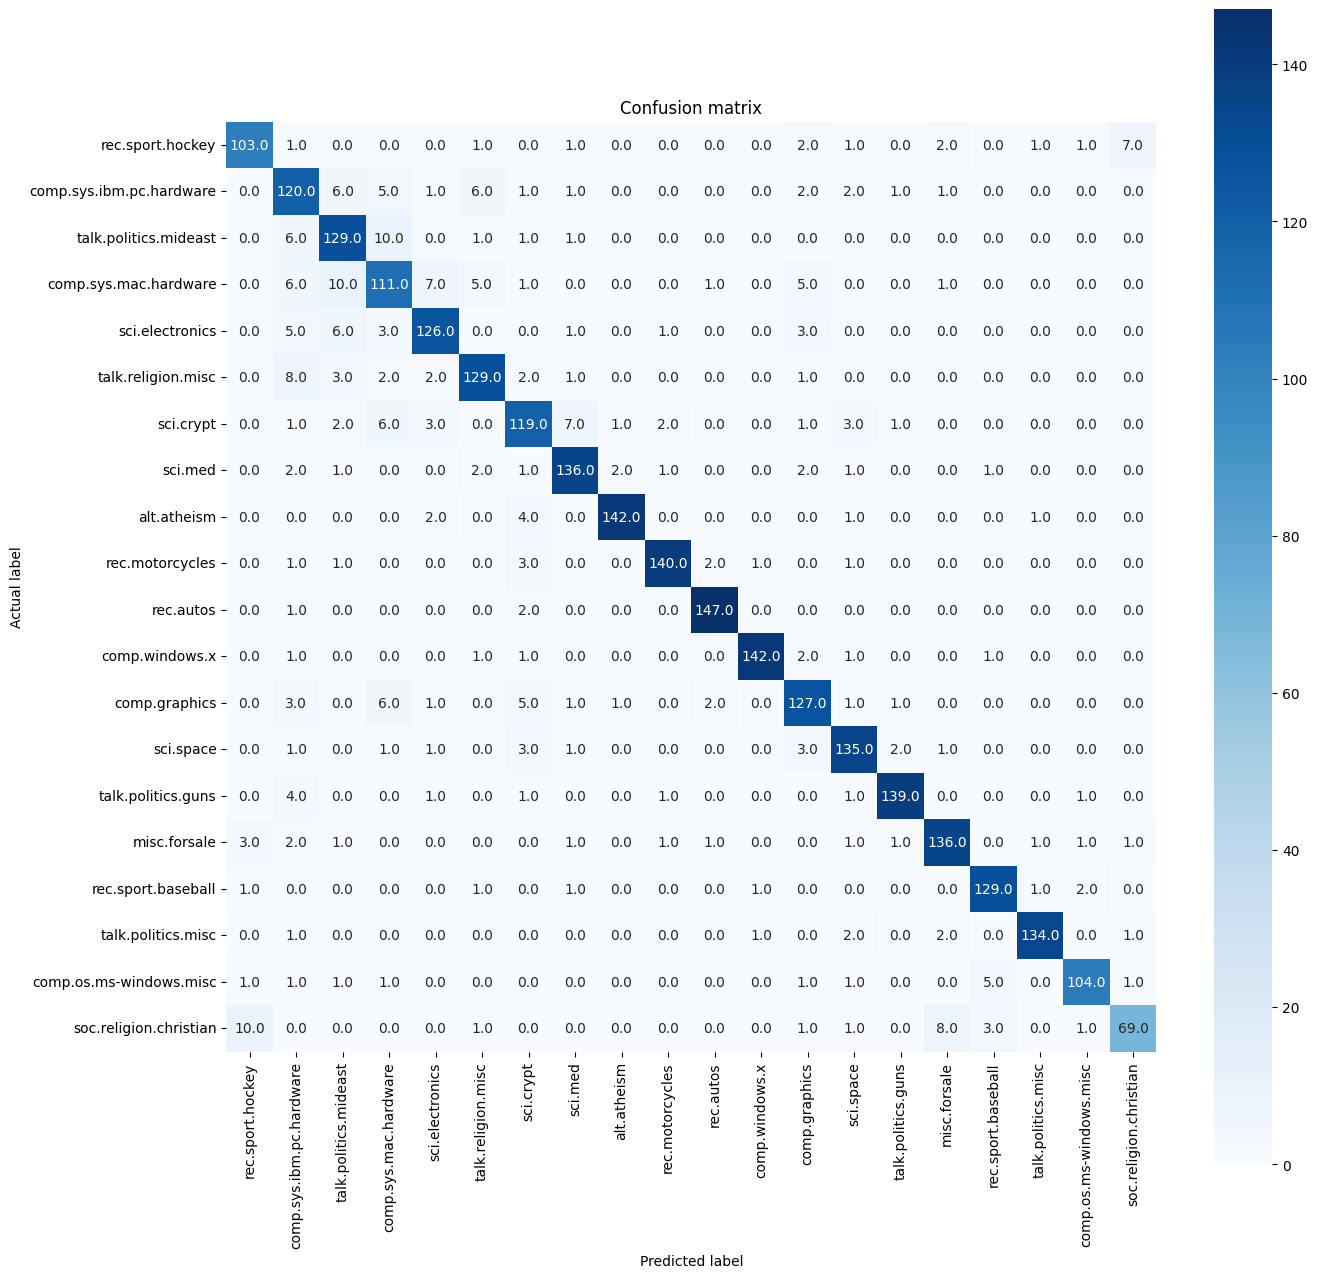

In [35]:
# heatmap
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_test)
# number without floating point
cm = cm.astype('int')
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, square=True, cmap='Blues', fmt='.1f', annot_kws={'size': 10},
            xticklabels=df['topic'].unique(), yticklabels=df['topic'].unique())
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')

plt.show()

In [26]:
df.to_csv('fe_data.csv', index=False)
import pickle
pickle.dump(pipeline, open('04_model.pkl', 'wb'))


In [ ]:
from sklearn.model_selection import GridSearchCV

# Create a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', VotingClassifier(estimators=[
        ('svc', LinearSVC()),
        ('logreg', LogisticRegression()),
        ('vc', SVC())
    ], voting='hard'))
])

# Create a parameter grid

param_grid = {
    'classifier__svc__C': [0.1, 1],
    'classifier__svc__penalty': ['l1', 'l2'],
    'classifier__svc__max_iter': [500, 1000, 5000],
    'classifier__svc__dual': [False],
    'classifier__logreg__multi_class': ['multinomial'],
    'classifier__logreg__max_iter': [5000, 10000],
    'classifier__logreg__class_weight': ['balanced'],
    'classifier__vc__kernel': ['linear'],
    'classifier__vc__C': [5, 10, 20],
    'classifier__vc__class_weight': ['balanced']
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)




In [28]:
# Best params
print(grid_search.best_params_)
# Best score
print(grid_search.best_score_)
# Best estimator
print(grid_search.best_estimator_)


{'classifier__logreg__class_weight': 'balanced', 'classifier__logreg__max_iter': 5000, 'classifier__logreg__multi_class': 'multinomial', 'classifier__svc__C': 0.1, 'classifier__svc__dual': False, 'classifier__svc__max_iter': 500, 'classifier__svc__penalty': 'l2', 'classifier__vc__C': 5, 'classifier__vc__class_weight': 'balanced', 'classifier__vc__kernel': 'linear'}
0.8774237488081894
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer(max_features=10000)),
                                                                  ('scaler',
                                                                   MaxAbsScaler())]),
                                                  'clean_text'),
                                                 ('numeric', 'passthrough',
                                     